<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


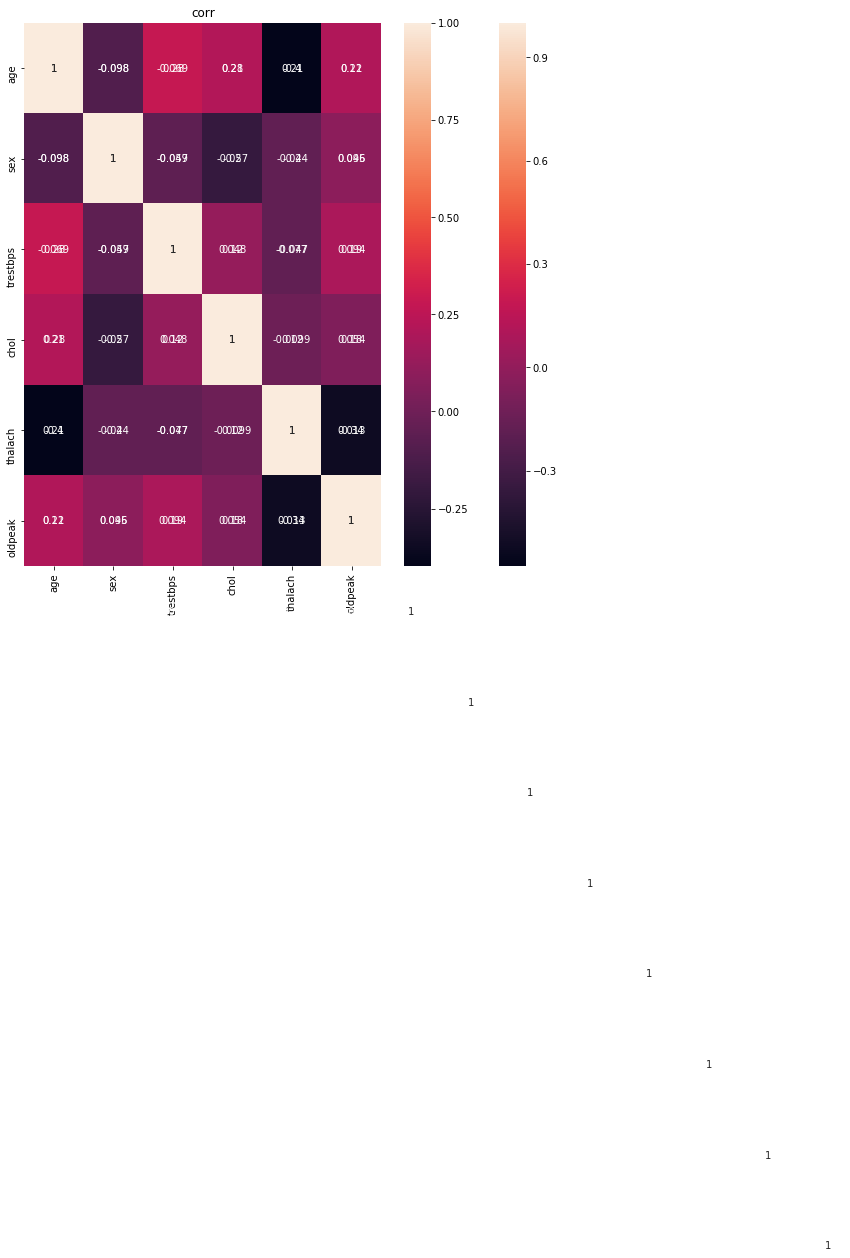

<Figure size 720x720 with 0 Axes>

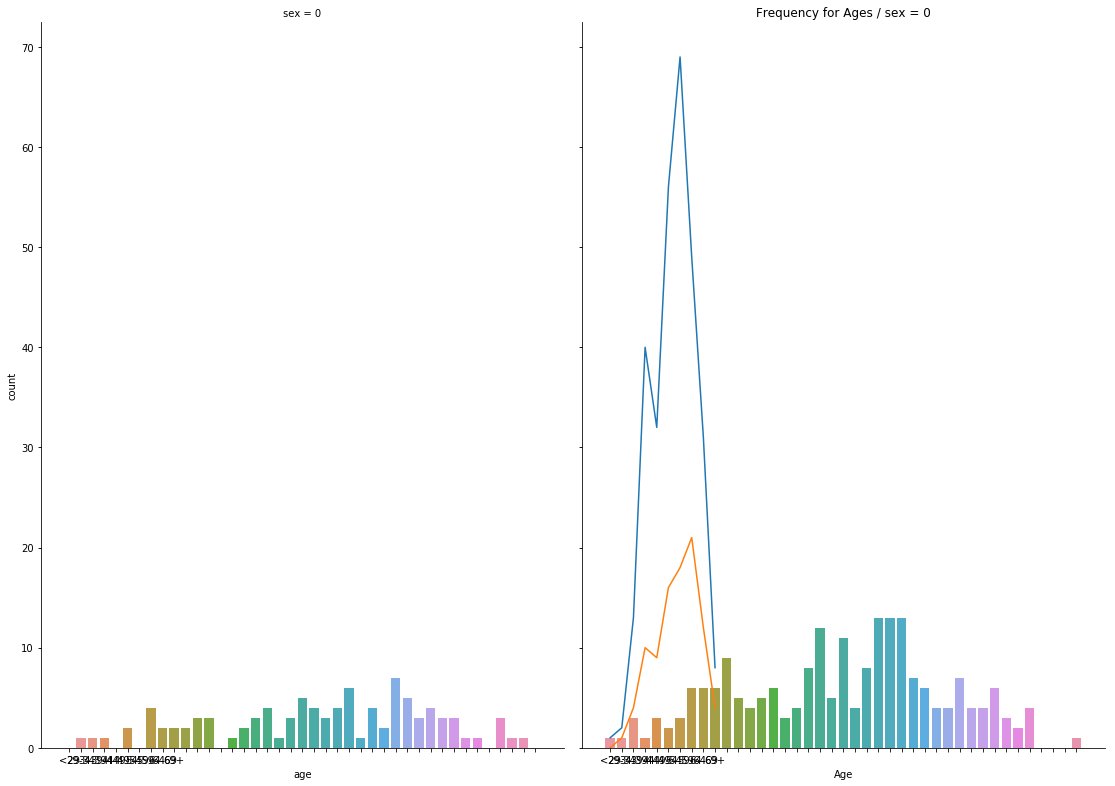

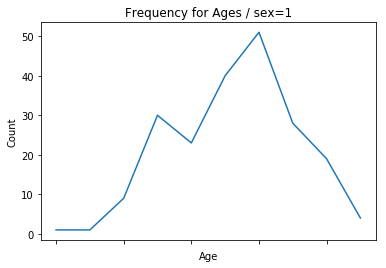

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null object
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null object
restecg     303 non-null object
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null object
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
AgeRange    301 non-null category
dtypes: category(1), float64(1), int64(5), object(8)
memory usage: 33.9+ KB
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.88      0.84      0.86        43

   micro avg       0.84      0.84      0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

0.842105263157

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:72: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

#exploratory
df = pd.read_csv('../input/heart.csv')

pd.set_option('display.max_columns', None)
df.info()
df.describe()
df.columns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, cbar = True)
sns.heatmap(df[['age', 'sex', 'trestbps', 'chol','thalach', 'oldpeak']].corr(), annot = True, cbar = True)
plt.title("corr")

# basic da / age-sex
df.groupby(['sex'])['sex'].count()

plt.figure(figsize=(10, 10))
sns.catplot(x="age", col="sex", data=df, kind="count", height=11, aspect=.7); 

bins = [0, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74]
names =   ['<29', '29-34', '34-39', '39-44', '44-49', '49-54', '54-59', '59-64', '64-69','69+']
df['AgeRange'] = pd.cut(df['age'], bins, labels=names)

df.groupby(['AgeRange'])['age'].count()
df.groupby(['AgeRange'])['age'].count().plot()

df[df['sex']==0].groupby(['AgeRange'])['age'].count().plot()
plt.title('Frequency for Ages / sex = 0')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


df[df['sex']==1].groupby(['AgeRange'])['age'].count().plot()
plt.title('Frequency for Ages / sex=1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# prepare RM
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for i in cols:
    df[i]=df[i].astype(object);
    
df.info()

df=pd.get_dummies(df)
df.head


#logistic regression
# Importing the dataset
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))





